In [1]:
from General import functies as functies
from General import classes as classes
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

0.033690000000000005

functie: <function find_sigma_values_2D.<locals>.<lambda> at 0x000001F5F05B9800>
Betrouwbaarheids intervallen voor de parameters: 
[[0.0024683131439562416, 0.002489545189874055]]
---------------------------
C_V heeft als waarde: 0.0024789 + 1.0623e-05 - 1.0609e-05 met 68% betrouwbaarheidsinterval: [0.0024683, 0.0024895] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.9862
De gereduceerde chi^2 waarde is: 0.2535


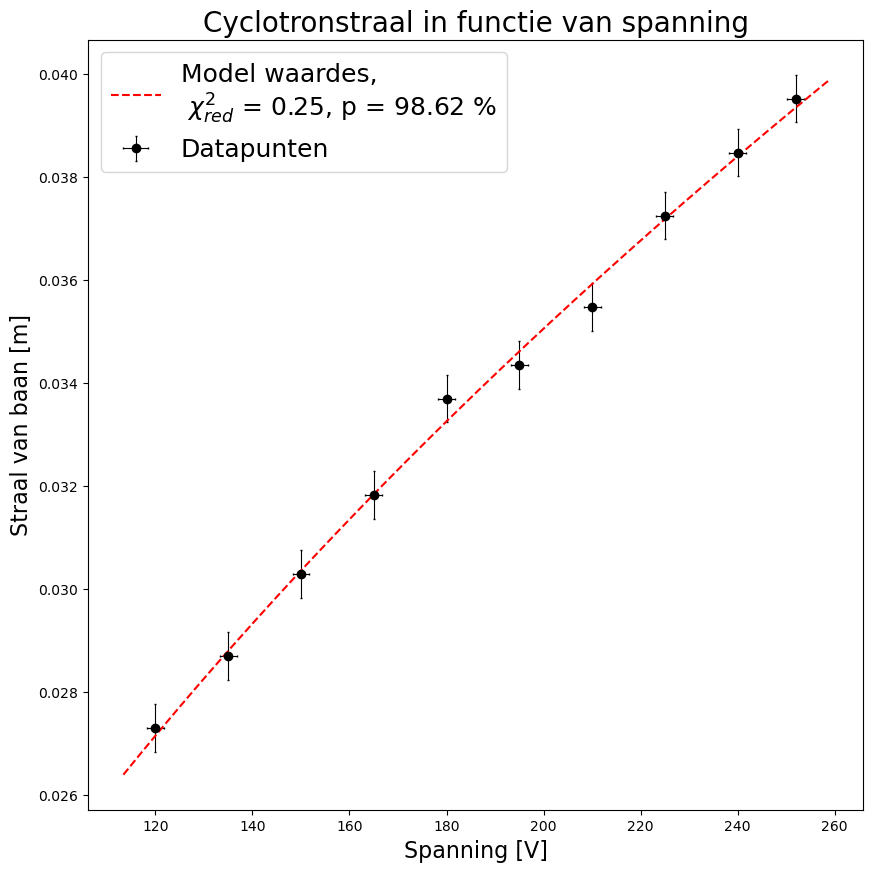

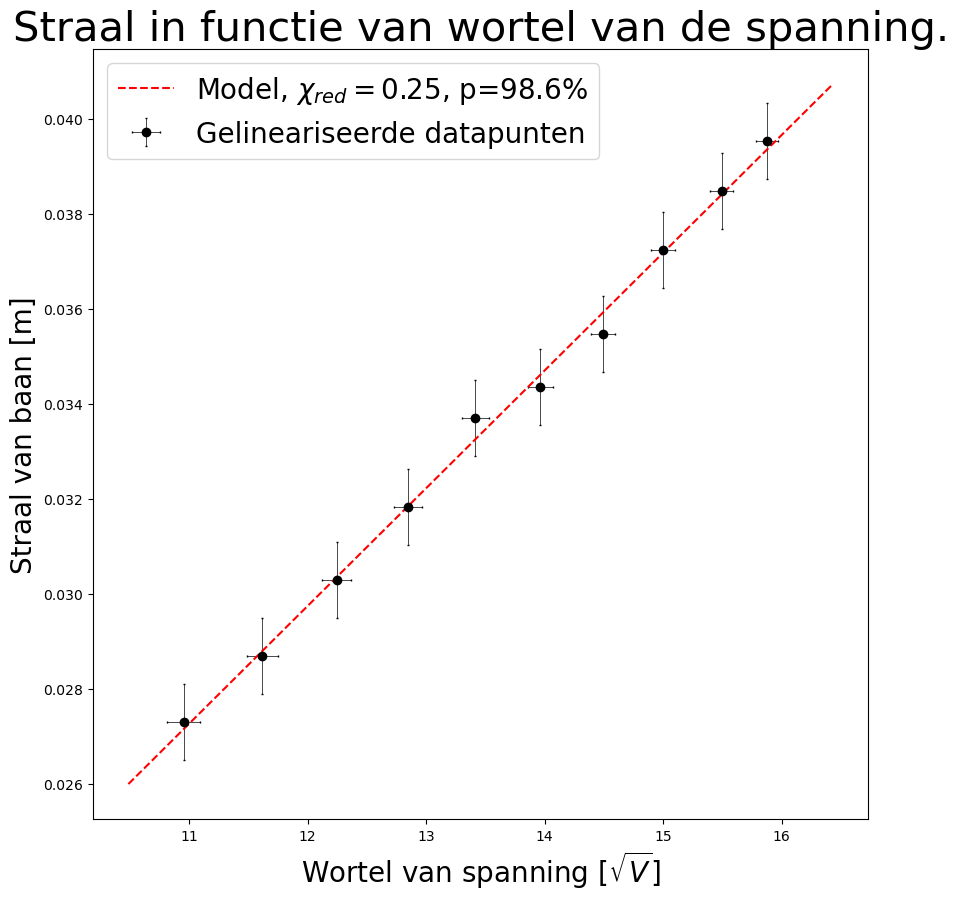

In [16]:
def V_r(spanning, params):
    C_v = params[0]
    return C_v*np.sqrt(spanning) #r = C_V sqrt(V)  =>V/r^2 = 1/C_V^2
def invals(x,y):
    return [0]

#metingen met voltage:
Vpercent = np.array([84, 80, 75, 70, 65, 60, 55, 50, 45, 40])/100
V = Vpercent*300 #Volt
toplijst = np.array([19.130, 19.215, 18.930, 18.770, 18.555, 18.530, 18.335, 18.160, 18.045, 17.900])/100 #m
bottomlijst = np.array([11.225, 11.520, 11.480, 11.675, 11.685, 11.790, 11.970, 12.100, 12.305, 12.440])/100
V_err = np.full(np.shape(V), 3) #1% * 300V

straal_V = (toplijst - bottomlijst)/2
display(np.mean(straal_V))
straal_V_err = np.full(np.shape(straal_V), 0.08/100) #sqrt(2)*0.01/2


C_Vsymb = sp.symbols('C_V')
C_V = functies.vector_to_datapunt(functies.fit_2D(['C_V'], V_r, invals, V, straal_V, x_variance = V_err**2/3, y_variance = straal_V_err**2/3, x_as_titel= 'Spanning [V]', y_as_titel='Straal van baan [m]', titel = 'Cyclotronstraal in functie van spanning')[0], C_Vsymb)

fig, ax = plt.subplots(1,1, figsize = (10,10))
V_lijst = np.linspace(110, 270, 10000)
ax.errorbar(np.sqrt(V), straal_V, yerr=straal_V_err, xerr= V_err/(2*np.sqrt(V)), fmt = "o", label = "Gelineariseerde datapunten", ecolor = "black", elinewidth=0.5, capsize=1, color = "black")
ax.plot(np.sqrt(V_lijst), C_V.get_val() * np.sqrt(V_lijst), "r--", label = "Model, $\chi_{red} = 0.25$, p=98.6%")
ax.set_ylabel("Straal van baan [m]", fontsize = 20)
ax.set_xlabel("Wortel van spanning [$\sqrt{V}$]", fontsize = 20)
ax.set_title("Straal in functie van wortel van de spanning.", fontsize = 30)
ax.legend(fontsize = 20)
plt.show()

0.0375025

array([0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008,
       0.0008, 0.0008])

functie: <function find_sigma_values_2D.<locals>.<lambda> at 0x000001F5F0734C20>
Betrouwbaarheids intervallen voor de parameters: 
[[0.06663712473190658, 0.06714505361879097]]
---------------------------
C_I heeft als waarde: 0.066891 + 0.00025397 - 0.00025396 met 68% betrouwbaarheidsinterval: [0.066637, 0.067145] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 7.5062e-13
De gereduceerde chi^2 waarde is: 8.5151


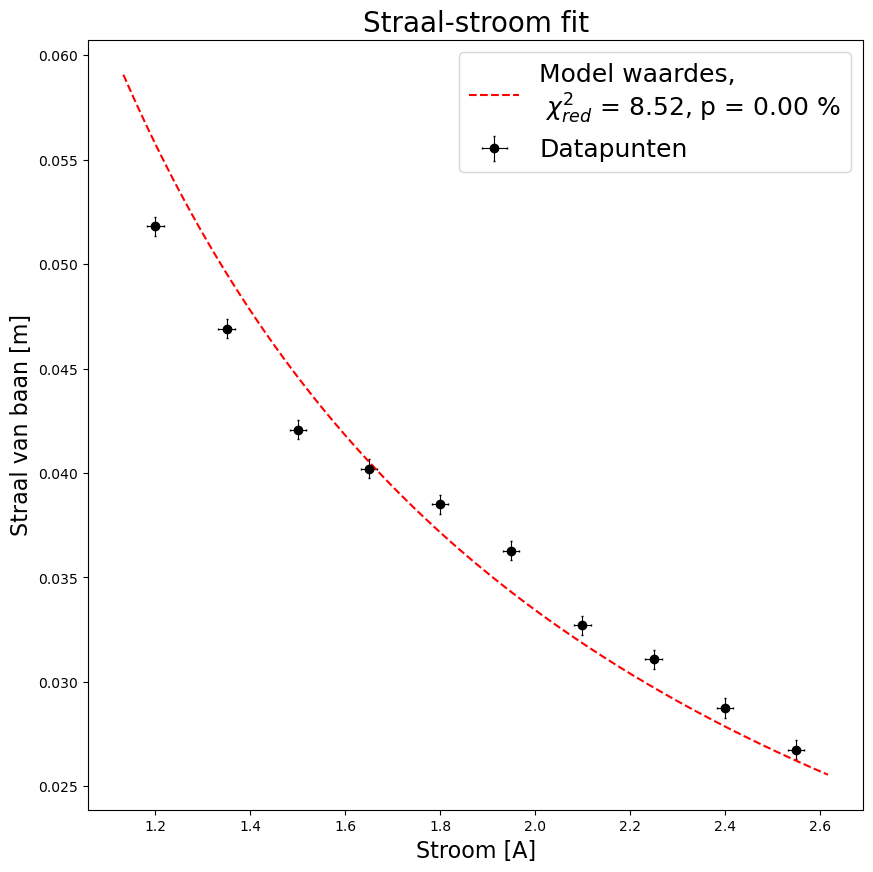

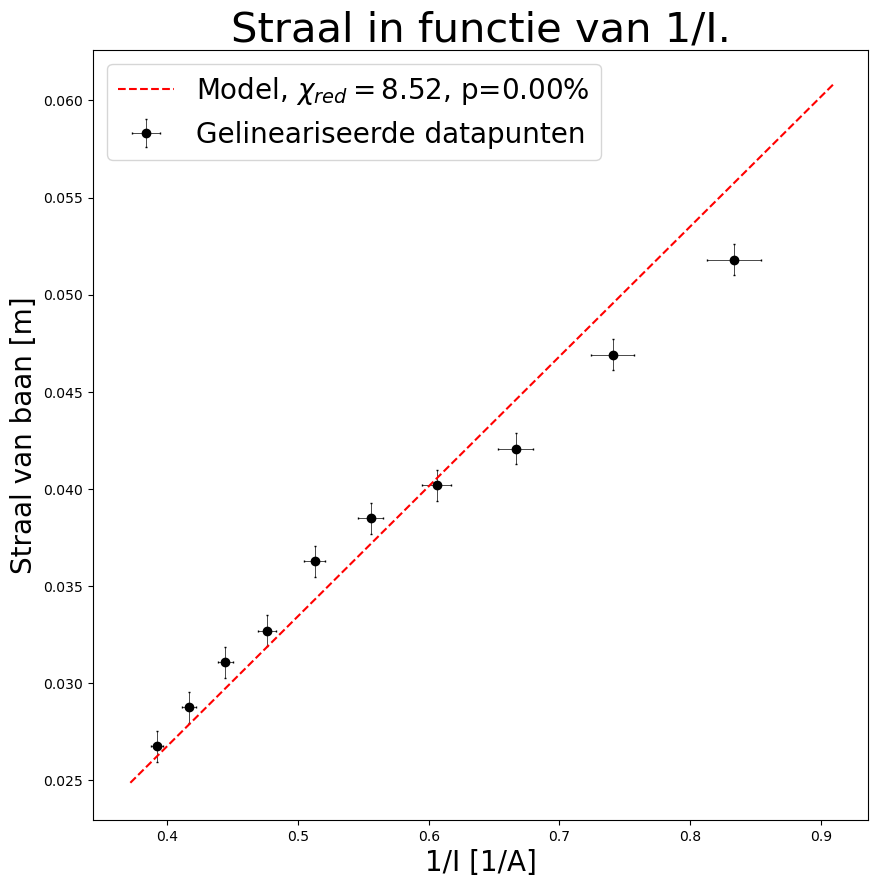

In [17]:
def I_r(stroom, params):
    C = params[0]
    return C/stroom
def invals(x,y):
    return [0]

#metingen met voltage:
Ipercent = np.array([85, 80, 75, 70, 65, 60, 55, 50, 45, 40])/100
stroom = Ipercent*3 #Ampere
toplijst = np.array([17.705, 17.925, 18.130, 18.305, 18.685, 18.945, 19.465, 19.950, 20.430, 21.055])/100 #m
bottomlijst = np.array([12.355, 12.175, 11.915, 11.765, 11.430, 11.245, 11.425, 11.535, 11.050, 10.695])/100
I_err = np.full(np.shape(stroom), 3/100) #1% * 300V

straal_I = (toplijst - bottomlijst)/2
display(np.mean(straal_I))
straal_I_err = np.full(np.shape(straal_I), 0.08/100) #sqrt(2)*0.01/2
display(straal_I_err)

C_Isymb = sp.symbols('C_I')
C_I = functies.vector_to_datapunt(functies.fit_2D(['C_I'], I_r, invals, stroom, straal_I, x_variance = I_err**2/3, y_variance = straal_I_err**2/3, x_as_titel= 'Stroom [A]', y_as_titel='Straal van baan [m]', titel = 'Straal-stroom fit')[0], C_Isymb)

fig, ax = plt.subplots(1,1, figsize = (10,10))
I_lijst = np.linspace(1.1, 2.7, 10000)
ax.errorbar(1/stroom, straal_I, yerr=straal_I_err, xerr= I_err/(stroom**2), fmt = "o", label = "Gelineariseerde datapunten", ecolor = "black", elinewidth=0.5, capsize=1, color = "black")
ax.plot(1/I_lijst, C_I.get_val()/I_lijst, "r--", label = "Model, $\chi_{red} = 8.52$, p=0.00%")
ax.set_ylabel("Straal van baan [m]", fontsize = 20)
ax.set_xlabel("1/I [1/A]", fontsize = 20)
ax.set_title("Straal in functie van 1/I.", fontsize = 30)
ax.legend(fontsize = 20)
plt.show()

In [4]:
print(C_V)
Bsymb = sp.symbols('B')
I = classes.datapunt(1.75, 0.03, Bsymb, 'Uniform') #ampere
mu_0 = 4e-7*np.pi
r = 150e-3
N = 130
B = I*r**2 * (1/(2*(r**2+(r/2)**2)**1.5)) * (2* N) * mu_0 #x = r/2
print(B)
emratio = B**(-2) * 2 * C_V**(-2)
print(emratio)


datapunt: C_V = [0.0024789217171844093, 1.0623472689645641e-05, 'S']
datapunt: B = [0.00136375069978604, 2.3378583424903538e-05, 'Uniform']
datapunt: B*C_V = [174998529075.4708, 6184590102.815431, 'Normaal']


In [14]:
print(C_I)
V_symb = sp.symbols('V')
V = classes.datapunt(255, 3, V_symb, 'Uniform')
mu_0 = 4e-7*np.pi
r = 150e-3
N = 130
teller = (V * (r**2 + (r/2)**2)**3)
display(type(teller))
noemer = (2*((2*N)**2) * (mu_0**2)*(r**4))
emratio_I = teller * C_I**(-2)
emratio_I = emratio_I*noemer**(-1)
print(emratio_I)
functies.latex_print_datapunt(emratio_I)
display(emratio.get_val() - emratio_I.get_val())

datapunt: C_I = [0.06689108174657285, 0.0002539718722181228, 'S']


General.classes.datapunt

datapunt: V*C_I = [11730590632.393663, 119513234.07104076, 'Normaal']
$V*C_I = (1173 \pm 12)\cdot 10^{7}$


163267938443.07712

In [ ]:
print('e-m-ratio value')
functies.latex_print_datapunt(emratio)
print('p-waarde van overeenkomst')
print(functies.normaaltest(1.758820e11, functies.datapunt_to_vector(emratio)))
#is B verwaarloosbaar?
print('gebruikte B:')
print(B)
print('orde B-veld aarde: 10^-4 T')

e-m-ratio value
$B*C_V = (1750 \pm 61)\cdot 10^{8}$
p-waarde van overeenkomst
0.8864083631222992
gebruikte B:
datapunt: B = [0.00136375069978604, 2.3378583424903538e-05, 'Uniform']
orde B-veld aarde: 10^-4 T
